In [12]:
import numpy as np
import pandas as pd

In [3]:
digits_train = pd.read_csv('d:/Data/Python2Kaggle/optdigits/optdigits.tra', header=None)
digits_test = pd.read_csv('d:/Data/Python2Kaggle/optdigits/optdigits.tes', header=None)

In [5]:
X_train = digits_train[np.arange(64)]
y_train = digits_train[64]
X_test = digits_test[np.arange(64)]
y_test = digits_test[64]

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters=10)

In [40]:
print(X_train)

      0   1   2   3   4   5   6   7   8   9  ...  54  55  56  57  58  59  60  \
0      0   1   6  15  12   1   0   0   0   7 ...   0   0   0   0   6  14   7   
1      0   0  10  16   6   0   0   0   0   7 ...   3   0   0   0  10  16  15   
2      0   0   8  15  16  13   0   0   0   1 ...   0   0   0   0   9  14   0   
3      0   0   0   3  11  16   0   0   0   0 ...   0   0   0   0   0   1  15   
4      0   0   5  14   4   0   0   0   0   0 ...  12   0   0   0   4  12  14   
5      0   0  11  16  10   1   0   0   0   4 ...   8   3   0   0  10  16  16   
6      0   0   1  11  13  11   7   0   0   0 ...   0   0   0   0   1  13   5   
7      0   0   8  10   8   7   2   0   0   1 ...   0   0   0   0   4  13   8   
8      0   0  15   2  14  13   2   0   0   0 ...   0   0   0   0  10  12   5   
9      0   0   3  13  13   2   0   0   0   6 ...  12   0   0   0   3  15  11   
10     0   0   6  14  14  16  16   8   0   0 ...   0   0   0   0  10  12   0   
11     0   0   0   3  16  11   1   0   0

In [8]:
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
y_pred = kmeans.predict(X_test)

In [10]:
from sklearn import metrics

In [11]:
print(metrics.adjusted_rand_score(y_test, y_pred))

0.6733818508727982


In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

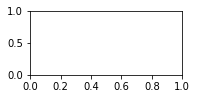

In [14]:
plt.subplot(3,2,1)

In [46]:
x1 = np.array([1,2,3,1,5,6,5,5,6,7,8,9,7,9])
x2 = np.array([1,3,2,2,8,6,7,6,7,1,2,1,1,3])

In [47]:
X = zip(x1, x2)
for i in X:
  print(i)

(1, 1)
(2, 3)
(3, 2)
(1, 2)
(5, 8)
(6, 6)
(5, 7)
(5, 6)
(6, 7)
(7, 1)
(8, 2)
(9, 1)
(7, 1)
(9, 3)


In [32]:
# X = np.array(zip(x1, x2)).reshape(len(x1),2)

ValueError: cannot reshape array of size 1 into shape (14,2)

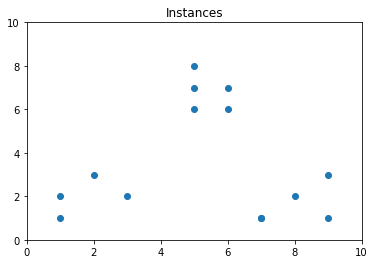

In [36]:
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Instances')
plt.scatter(x1,x2)

In [20]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']

In [21]:
clusters = [2,3,4,5,8]

In [23]:
subplot_counter = 1
sc_scores=[]

TypeError: float() argument must be a string or a number, not 'zip'

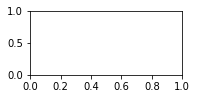

In [39]:
for t in clusters:
  subplot_counter += 1
  plt.subplot(3,2,subplot_counter)
  kmeans_model = KMeans(n_clusters=t).fit(X)
  for i,l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')
    plt.xlim([0,10])
    plt.ylim([0,10])
    sc_score = silhouette_score(X, kmeans_model.labels_, metric='euclidean')
    sc_scores.append(sc_score)

In [25]:
plt.title('K=%s, silhouette coeffient=%0.03f' %(t, sc_score))

NameError: name 'sc_score' is not defined

In [26]:
plt.figure()

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

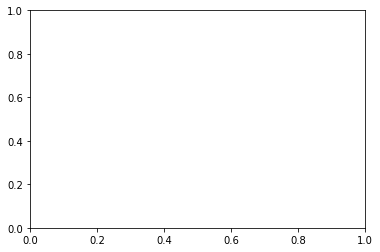

In [37]:
plt.plot(clusters, sc_scores, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coeffient Score')
plt.show()